<a href="https://colab.research.google.com/github/Daniel-Francisco-Calderon-Lebro/Vision_por_Computador/blob/main/RedNeuronal_de_DigitosMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
import tensorflow as tf
# from keras.utils import np_utils
# from keras.layers.core import Dense, Activation, Dropout

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
ruta = '/content/drive/MyDrive/Vision por computador/DigitosMLP/'


In [3]:
28*28

784

In [5]:

# Read data
train = pd.read_csv(ruta + 'train.csv')
test = pd.read_csv(ruta +'test.csv')
print(train.sample(n=3))
print(test.sample(n=3))

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
39143      1       0       0       0       0       0       0       0       0   
29632      3       0       0       0       0       0       0       0       0   
2919       6       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
39143       0  ...         0         0         0         0         0   
29632       0  ...         0         0         0         0         0   
2919        0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
39143         0         0         0         0         0  
29632         0         0         0         0         0  
2919          0         0         0         0         0  

[3 rows x 785 columns]
      pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
6318       0       0       0       0       0       0  

In [6]:
train


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train = train[train.columns[1:]].values.astype('float32')
X_train.shape

(42000, 784)

perfil de  3.0


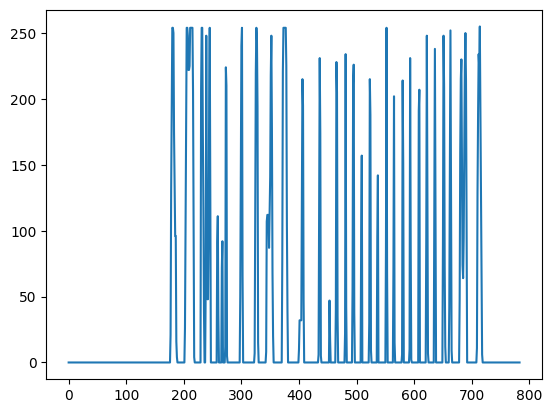

In [8]:
# cada fila tiene los valores de los píxeles de una imagen de 28x28
labels = train[train.columns[0]].values.astype('float32')
n = 7
muestra = X_train[n][:]
immuestra = muestra.reshape(28,28)
print('perfil de ',labels[n])
plt.plot(muestra)

In [9]:
y_train = []
for i in labels:
  x = [0]*10
  x[int(i)]=1
  y_train.append(x)
y_train = np.array(y_train)
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [10]:
# y_trato_categoricalin = np_utils.(labels)
y_train.shape
y_train[70]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [11]:
train['label'][70]

3

perfil de  4.0


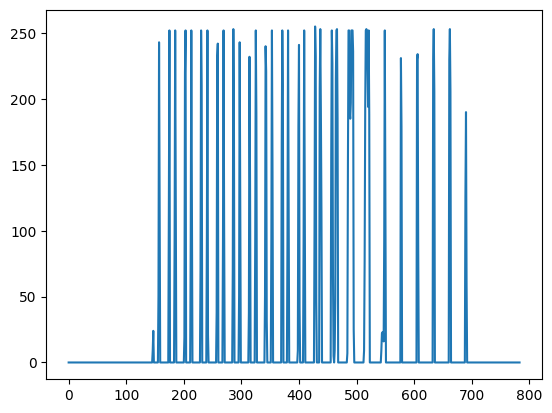

In [12]:
# cada fila tiene los valores de los píxeles de una imagen de 28x28
n = 41587
muestra = X_train[n][:]
immuestra = muestra.reshape(28,28)
print('perfil de ',labels[n])
plt.plot(muestra)


imagen de  4.0


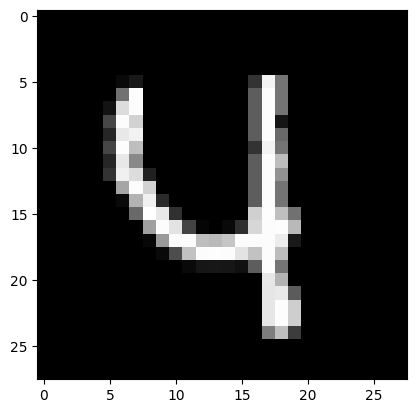

In [13]:
print('imagen de ',labels[n])
plt.imshow(immuestra,cmap = 'gray')

<StemContainer object of 3 artists>

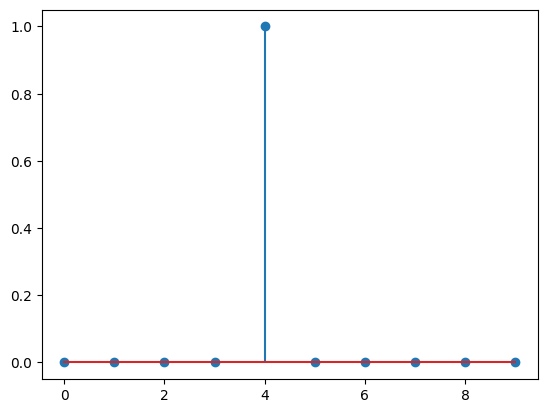

In [14]:
plt.stem(y_train[n])

In [15]:
X_test = test[test.columns[0:]].values.astype('float32')
X_test.shape

(28000, 784)

In [16]:
X_train.shape

(42000, 784)

In [17]:
# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale # X_train = X_train/scale
X_test /= scale

mean = np.average(X_train)
X_train = X_train - mean
X_test = X_test - mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]


In [18]:
nb_classes

10

In [19]:
input_dim

784

In [20]:
# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=input_dim)) ## Capa de entrada
model.add(tf.keras.layers.Activation('relu')) #función de activación
model.add(tf.keras.layers.Dropout(0.15)) # Método de regularización de la capa

model.add(tf.keras.layers.Dense(128)) # Capa oculta
model.add(tf.keras.layers.Activation('relu')) #función de activación
model.add(tf.keras.layers.Dropout(0.15))# Método de regularización de la capa


model.add(tf.keras.layers.Dense(nb_classes)) # Capa de salida
model.add(tf.keras.layers.Activation('softmax')) #función de activación

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop') #EStilo para optimizar

print("Training...")
model.fit(X_train, y_train, epochs=10) #Ajuste a los datos



Training...
Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3188
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1624
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1285
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1101
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0995
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0944
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0871
Epoch 8/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0785
Epoch 9/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0787
Epoch 10/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0748


In [21]:

print("Generating test predictions...")
preds = model.predict(X_test)


Generating test predictions...
875/875 [==============================] - 5s 5ms/step


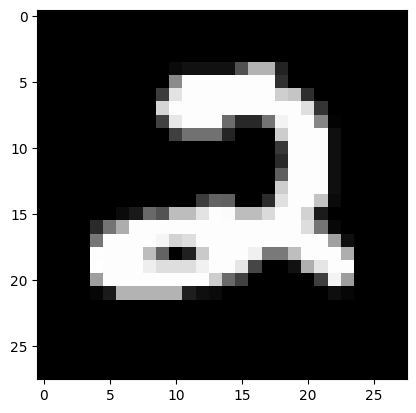

In [33]:
n = 0
muestra = X_test[n][:]
immuestra = muestra.reshape(28,28)
plt.imshow(immuestra,cmap='gray')

In [34]:
preds[n]

array([2.9321230e-20, 4.2276884e-20, 9.9999994e-01, 2.9501009e-17,
       4.2432714e-24, 3.2483289e-26, 1.2690398e-18, 3.9907021e-17,
       1.4323543e-19, 6.6587379e-25], dtype=float32)

<StemContainer object of 3 artists>

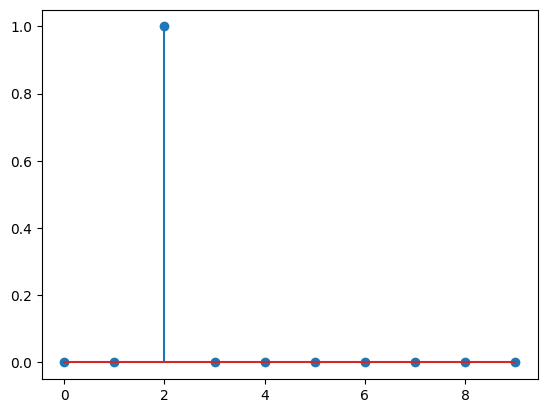

In [35]:
plt.stem(preds[n])

In [36]:
[preds.argmax(1)][0][:]

array([2, 0, 9, ..., 3, 9, 2])

In [37]:

def write_preds(preds, fname): # Aún falla

  pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": [preds.argmax(1)][0]}).to_csv(fname +'.csv', index=False, header=True)
  pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": [preds.argmax(1)][0]}).to_excel(fname +'.xlsx', index=False, header=True)

write_preds(preds, "keras-mlp")

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
